Importing the usual library and the data. Please modify file address depending on where you have saved the dataset and how you plan on running it.

In [10]:
import pandas as pd
import seaborn as sns

# this is using google drive / colab - but please edit depending on how you are running the notebook - here the assumption is the diabetes.csv file is in a connected drive under content
from google.colab import drive
drive.mount('/content/drive')

file_address= 'diabetes.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(file_address)
df.columns = df.columns.str.lower().str.replace(' ', '_')

To start with getting a snapshot of the data and high level stats

In [8]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

,0
pregnancies,0
glucose,0
bloodpressure,0
skinthickness,0
insulin,0
bmi,0
diabetespedigreefunction,0
age,0
outcome,0


There are no null entries so the dataset looks fairly clean at a high level.
Let's have a look at some basic statistics and also correlation.

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


or in a heatmap format:

<Axes: >

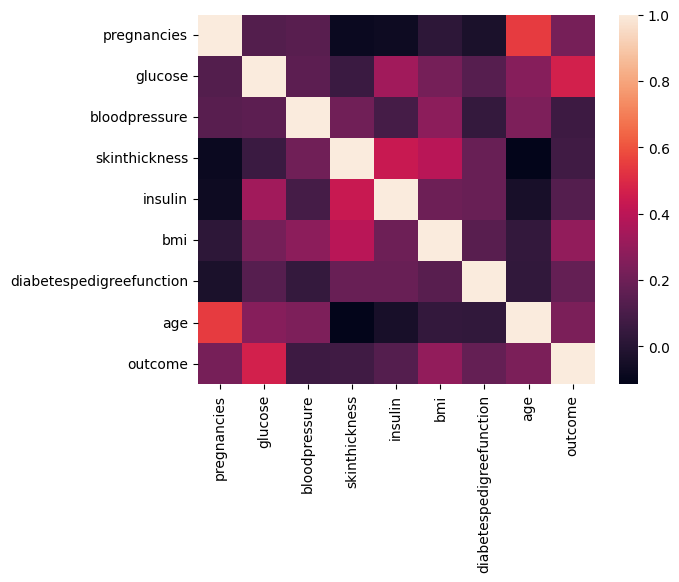

In [13]:
sns.heatmap(df.corr())

There doesn't seem to be super high correlated features to diabetes (outcome in the dataset) - as could be expected glucose is the highest correlated feature.

Let's move to modelling. We will start by importing the libraries we will use.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mutual_info_score, accuracy_score, roc_auc_score, classification_report
import xgboost as xgb

Let's prep the dataset and split it into training / validation and testing sets (80% / 20% / 20% split).

In [15]:
target = "outcome"

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

y_train = df_train[target]
y_full_train = df_full_train[target]
y_val = df_val[target]
y_test = df_test[target]
del df_train[target]
del df_full_train[target]
del df_val[target]
del df_test[target]


Let's start with a linear regression.

In [23]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=100, random_state=50)
model.fit(df_train, y_train)
y_pred = model.predict(df_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       101
           1       0.66      0.62      0.64        53

    accuracy                           0.76       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



Let's compare with a decision tree.

In [21]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
print("Decision Tree Classifier:")
print("AUC Score: ", round(roc_auc_score(y_val, y_pred),3))
print(classification_report(y_val, y_pred))

Decision Tree Classifier:
AUC Score:  0.692
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       101
           1       0.56      0.66      0.60        53

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.70      0.71       154



Let's now compare with a random forest.

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
features = dv.get_feature_names_out().tolist()
y_pred = rf.predict(X_val)
print("Random Forest Classifier:")
print(round(roc_auc_score(y_val, y_pred),5))
print(classification_report(y_val, y_pred))

Random Forest Classifier:
0.72128
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       101
           1       0.61      0.66      0.64        53

    accuracy                           0.74       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.75      0.74      0.74       154



Let's check feature importance.

In [25]:
f_importance = pd.Series(rf.feature_importances_, index = features).sort_values(ascending=False)
f_importance

,0
glucose,0.264730
bmi,0.169142
age,0.129315
diabetespedigreefunction,0.124721
bloodpressure,0.091352
pregnancies,0.077748
insulin,0.076288
skinthickness,0.066703


Let's try to optimize the random forest parameters to improve its metrics. Let's first go through different estimator values for the random forest model.

In [27]:
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    print(n, round(roc_auc_score(y_val, y_pred),5))

10 0.63777
20 0.65076
30 0.66066
40 0.65972
50 0.68849
60 0.68849
70 0.68849
80 0.68401
90 0.67906
100 0.72128
110 0.71184
120 0.70241
130 0.71184
140 0.71633
150 0.70241
160 0.69746
170 0.70241
180 0.70241
190 0.69298
200 0.69298


Let's check the average score for different depths.

In [ ]:
for m in [10, 15, 20]:
    mean_auc = 0
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        mean_auc += roc_auc_score(y_val, y_pred)
    mean_auc = mean_auc / 20
    print(m, round(mean_auc,5))

Let's do more iteration around the sweetspot.

In [33]:
for m in range(10,21):
    mean_auc = 0
    for n in range(50,151,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        mean_auc += roc_auc_score(y_val, y_pred)
    mean_auc = mean_auc / 11
    print(m, round(mean_auc,5))

10 0.68741
11 0.68798
12 0.69081
13 0.72194
14 0.69469
15 0.71058
16 0.70069
17 0.69992
18 0.69694
19 0.69694
20 0.69951


Using the best depths so far (13), let's iterate again on estimators.

In [34]:
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=13, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    print(n, round(roc_auc_score(y_val, y_pred),5))

10 0.67103
20 0.69344
30 0.71726
40 0.70288
50 0.7451
60 0.74463
70 0.70241
80 0.71726
90 0.71231
100 0.71231
110 0.72174
120 0.72174
130 0.72128
140 0.72128
150 0.72128
160 0.71633
170 0.70241
180 0.71679
190 0.70241
200 0.71679


Let's now pick the best parameters we found so fart (3 depth and 60 estimators), train on the model on our full_train data and compare with the results with the test data.

In [ ]:
rf = RandomForestClassifier(n_estimators=60, max_depth=13, random_state=1)
full_train_dicts = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dicts)
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict(X_test)
print("Random Forest Classifier on Test:")
print(round(roc_auc_score(y_test, y_pred),5))
print(classification_report(y_test, y_pred))

Random Forest Classifier on Test:
0.7828282828282828
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        99
           1       0.71      0.73      0.72        55

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



These look decent and outperform logistic regression. Let's see how this compares to xgboost.

In [38]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval,'val')]

xgb.set_config(verbosity=0)
model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)
y_pred = model.predict(dval)
estimate = y_pred >= 0.5
print("XGBoost:")
print(round(roc_auc_score(y_val, estimate),5))
print(classification_report(y_val, estimate))

[0]	train-logloss:0.59919	val-logloss:0.62005
[1]	train-logloss:0.55908	val-logloss:0.60228
[2]	train-logloss:0.52366	val-logloss:0.59276
[3]	train-logloss:0.49237	val-logloss:0.57807
[4]	train-logloss:0.46522	val-logloss:0.56661
[5]	train-logloss:0.44012	val-logloss:0.55846
[6]	train-logloss:0.41852	val-logloss:0.54818
[7]	train-logloss:0.39879	val-logloss:0.54305
[8]	train-logloss:0.37964	val-logloss:0.53588
[9]	train-logloss:0.36258	val-logloss:0.53347
[10]	train-logloss:0.34654	val-logloss:0.53407
[11]	train-logloss:0.33192	val-logloss:0.53171
[12]	train-logloss:0.31808	val-logloss:0.52741
[13]	train-logloss:0.30561	val-logloss:0.52284
[14]	train-logloss:0.29453	val-logloss:0.52199
[15]	train-logloss:0.28441	val-logloss:0.52231
[16]	train-logloss:0.27204	val-logloss:0.51586
[17]	train-logloss:0.26259	val-logloss:0.51614
[18]	train-logloss:0.25227	val-logloss:0.51552
[19]	train-logloss:0.24281	val-logloss:0.51508
[20]	train-logloss:0.23526	val-logloss:0.51369
[21]	train-logloss:0.22

Our trained random forest gives better performance both on validation and test so we will use this in our next steps, when we deploy the model.